# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import pickle



warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости экспериментов")

Для воспроизводимости экспериментов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include='object') # основные статистики по категириальным фичам

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [8]:
df_train.describe() # основные статистики по числовым фичам

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Тут наверно можно подискутировать и привести аргуементы за/против трактовки года как числовой фичи а не категориальной, но так как в данной задаче надо предсказать цену то логичнее наверно трактовать год как численную фичу - чем больше год, тем машина новее, тем больше она должна стоить относительно такой же машины, но старее.   

In [9]:
df_test.describe(include='object') # основные статистики по категириальным фичам

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [10]:
df_test.describe() # основные статистики по числовым фичам

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В трейне пропуски в колонках mileage, engine, max_power, torque, seats

In [12]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тесте тоже самое

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [13]:
num_of_duplicated_rows =  df_train.drop(columns=['selling_price'], axis=1).duplicated().sum()
print(f'Количестов дубликатов:{num_of_duplicated_rows}')

Количестов дубликатов:1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
df_train[(df_train.drop(columns=['selling_price'], axis=1).duplicated())]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
df_train.drop_duplicates(subset=['name','year','km_driven','fuel','seller_type','transmission','owner',
                                 'mileage','engine','max_power','torque','seats'], keep='first', inplace= True)

In [16]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [17]:
df_train.reset_index(drop=True,inplace=True)

In [18]:
df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
# преобразуем колонки mileage, engine, max_power
regexp = r'([0-9]*[.,]?[0-9]+)'

df_train['mileage'] = df_train['mileage'].str.extract(regexp).apply(pd.to_numeric)
df_train['engine'] = df_train['engine'].str.extract(regexp).apply(pd.to_numeric)
df_train['max_power'] = df_train['max_power'].str.extract(regexp).apply(pd.to_numeric)

df_test['mileage'] = df_test['mileage'].str.extract(regexp).apply(pd.to_numeric)
df_test['engine'] = df_test['engine'].str.extract(regexp).apply(pd.to_numeric)
df_test['max_power'] = df_test['max_power'].str.extract(regexp).apply(pd.to_numeric)

**Дополнительный пункт**

Общая суть в том, что в некоторых строках крутящий момент в ньютон метрах а в других в киллограм метрах.

Необходимо выразить все в ньютон метрах, для этого надо значение в киллограм метрах умножить на 9.8

0.25 балла тут конечно мало)) там столько неожиданностей оказалось, для разбора и отыскания которых потребовалось очень много времени.

были обнаружены след особенности:
  - У оборотов тысячи могут отделяться ','
  - максимальный крутящий момент может быть в диапазоне который разделяется "-" или "~"
  - максимальные обороты и еще значение после них перед которым стоит +/-
  - обороты выраженные как в Nm так и в kgm
  - без указания единиц измерения

In [20]:
# функция для преобразования колонки torque
def column_pars(col):

  torque = []
  max_torque_rpm = []
  regexp = r'([0-9]*[.,]?[0-9]+)'
  for value in col:
      # приводим значения к нижнему регистру и удаляем ','
      value = str(value).lower().replace(',', '')

      if value == 'nan':
        torque.append(None)
        max_torque_rpm.append(None)

      elif 'nm' in value and 'kgm' in value:
        # 0 значение - крутящий момент в Nm
        # 2 значение - обороты
        info = re.findall(regexp, value)
        torque.append(float(info[0]))
        max_torque_rpm.append(float(info[2]))

      elif 'nm' in value:
        if '+' in value:
          # 0 значение - крутящий момент
          # 1 значение - обороты
          # 2 значение - обороты которые надо прибавить к 1 значению
          info = re.findall(regexp, value)

          torque.append(float(info[0]))
          max_torque_rpm.append(float(info[1]) + float(info[2]))

        elif ('-' in value or '~' in value) and '+' not in value:
          # 0 значение - крутящий момент
          # 2 значение -  максимальное значение оборотов
          info = re.findall(regexp, value)

          torque.append(float(info[0]))
          max_torque_rpm.append(float(info[2]))

        else:
          # 0 значение - крутящий момент
          # 1 значение - обороты (может не быть)
          info = re.findall(regexp, value)

          torque.append(float(info[0]))

          if len(info) > 1:
            max_torque_rpm.append(float(info[1]))
          else:
            max_torque_rpm.append(None)

      elif 'kgm' in value:
        if '+' in value:
          # 0 значение - крутящий момент
          # 1 значение - обороты
          # 2 значение - обороты которые надо прибавить к 1 значению
          info = re.findall(regexp, value)

          torque.append(float(info[0]) * 9.8)
          max_torque_rpm.append(float(info[1]) + float(info[2]))

        elif ('-' in value or '~' in value) and '+' not in value:
          # 0 значение - крутящий момент
          # 2 значение -  максимальное значение оборотов
          info = re.findall(regexp, value)

          torque.append(float(info[0]) * 9.8)
          max_torque_rpm.append(float(info[2]))

        else:
          # 0 значение - крутящий момент
          # 1 значение - обороты (может не быть)
          info = re.findall(regexp, value)

          torque.append(float(info[0]) * 9.8)

          if len(info) > 1:
            max_torque_rpm.append(float(info[1]))
          else:
            max_torque_rpm.append(None)
      else:
        # значение в Nm и kgm но без указания единиц измерения
        if '(' in value:
          # 0 значение - крутящий момент в Nm
          # 2 значение - обороты
          info = re.findall(regexp, value)

          torque.append(float(info[0]))
          max_torque_rpm.append(float(info[2]))
        elif '-' in value:
          # 0 значение - крутящий момент
          # 2 значение -  максимальное значение оборотов
          info = re.findall(regexp, value)

          torque.append(float(info[0]))
          max_torque_rpm.append(float(info[2]))
        else:
          # 0 значение - крутящий момент
          # 1 значение - обороты (может не быть)
          info = re.findall(regexp, value)

          torque.append(float(info[0]))
          max_torque_rpm.append(float(info[1]))
  return torque, max_torque_rpm

In [21]:
torque_train, max_rpm_train = column_pars(df_train.torque)
torque_test, max_rpm_test = column_pars(df_test.torque)

In [22]:
assert len(torque_train) == df_train.shape[0]
assert len(max_rpm_train) == df_train.shape[0]
assert len(torque_test) == df_test.shape[0]
assert len(max_rpm_test) == df_test.shape[0]


In [23]:
df_train['torque'] = pd.DataFrame(torque_train)
df_train['max_torque_rpm'] = pd.DataFrame(max_rpm_train)

df_test['torque'] = pd.DataFrame(torque_test)
df_test['max_torque_rpm'] = pd.DataFrame(max_rpm_test)

Посмотрим на данные после преобразования

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          981 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  977 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [26]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_train.median())

In [27]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [28]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [29]:
print("Если сделать численной то линейная модель может считать машины с 4 местами лучше(дороже) чем с 2 или наоборот,а это не так.\n С числовыми признаками модель будет работать как с числами и искать линейную зависимость( 4 > 3 >2 итд)")

Если сделать численной то линейная модель может считать машины с 4 местами лучше(дороже) чем с 2 или наоборот,а это не так.
 С числовыми признаками модель будет работать как с числами и искать линейную зависимость( 4 > 3 >2 итд)


In [30]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

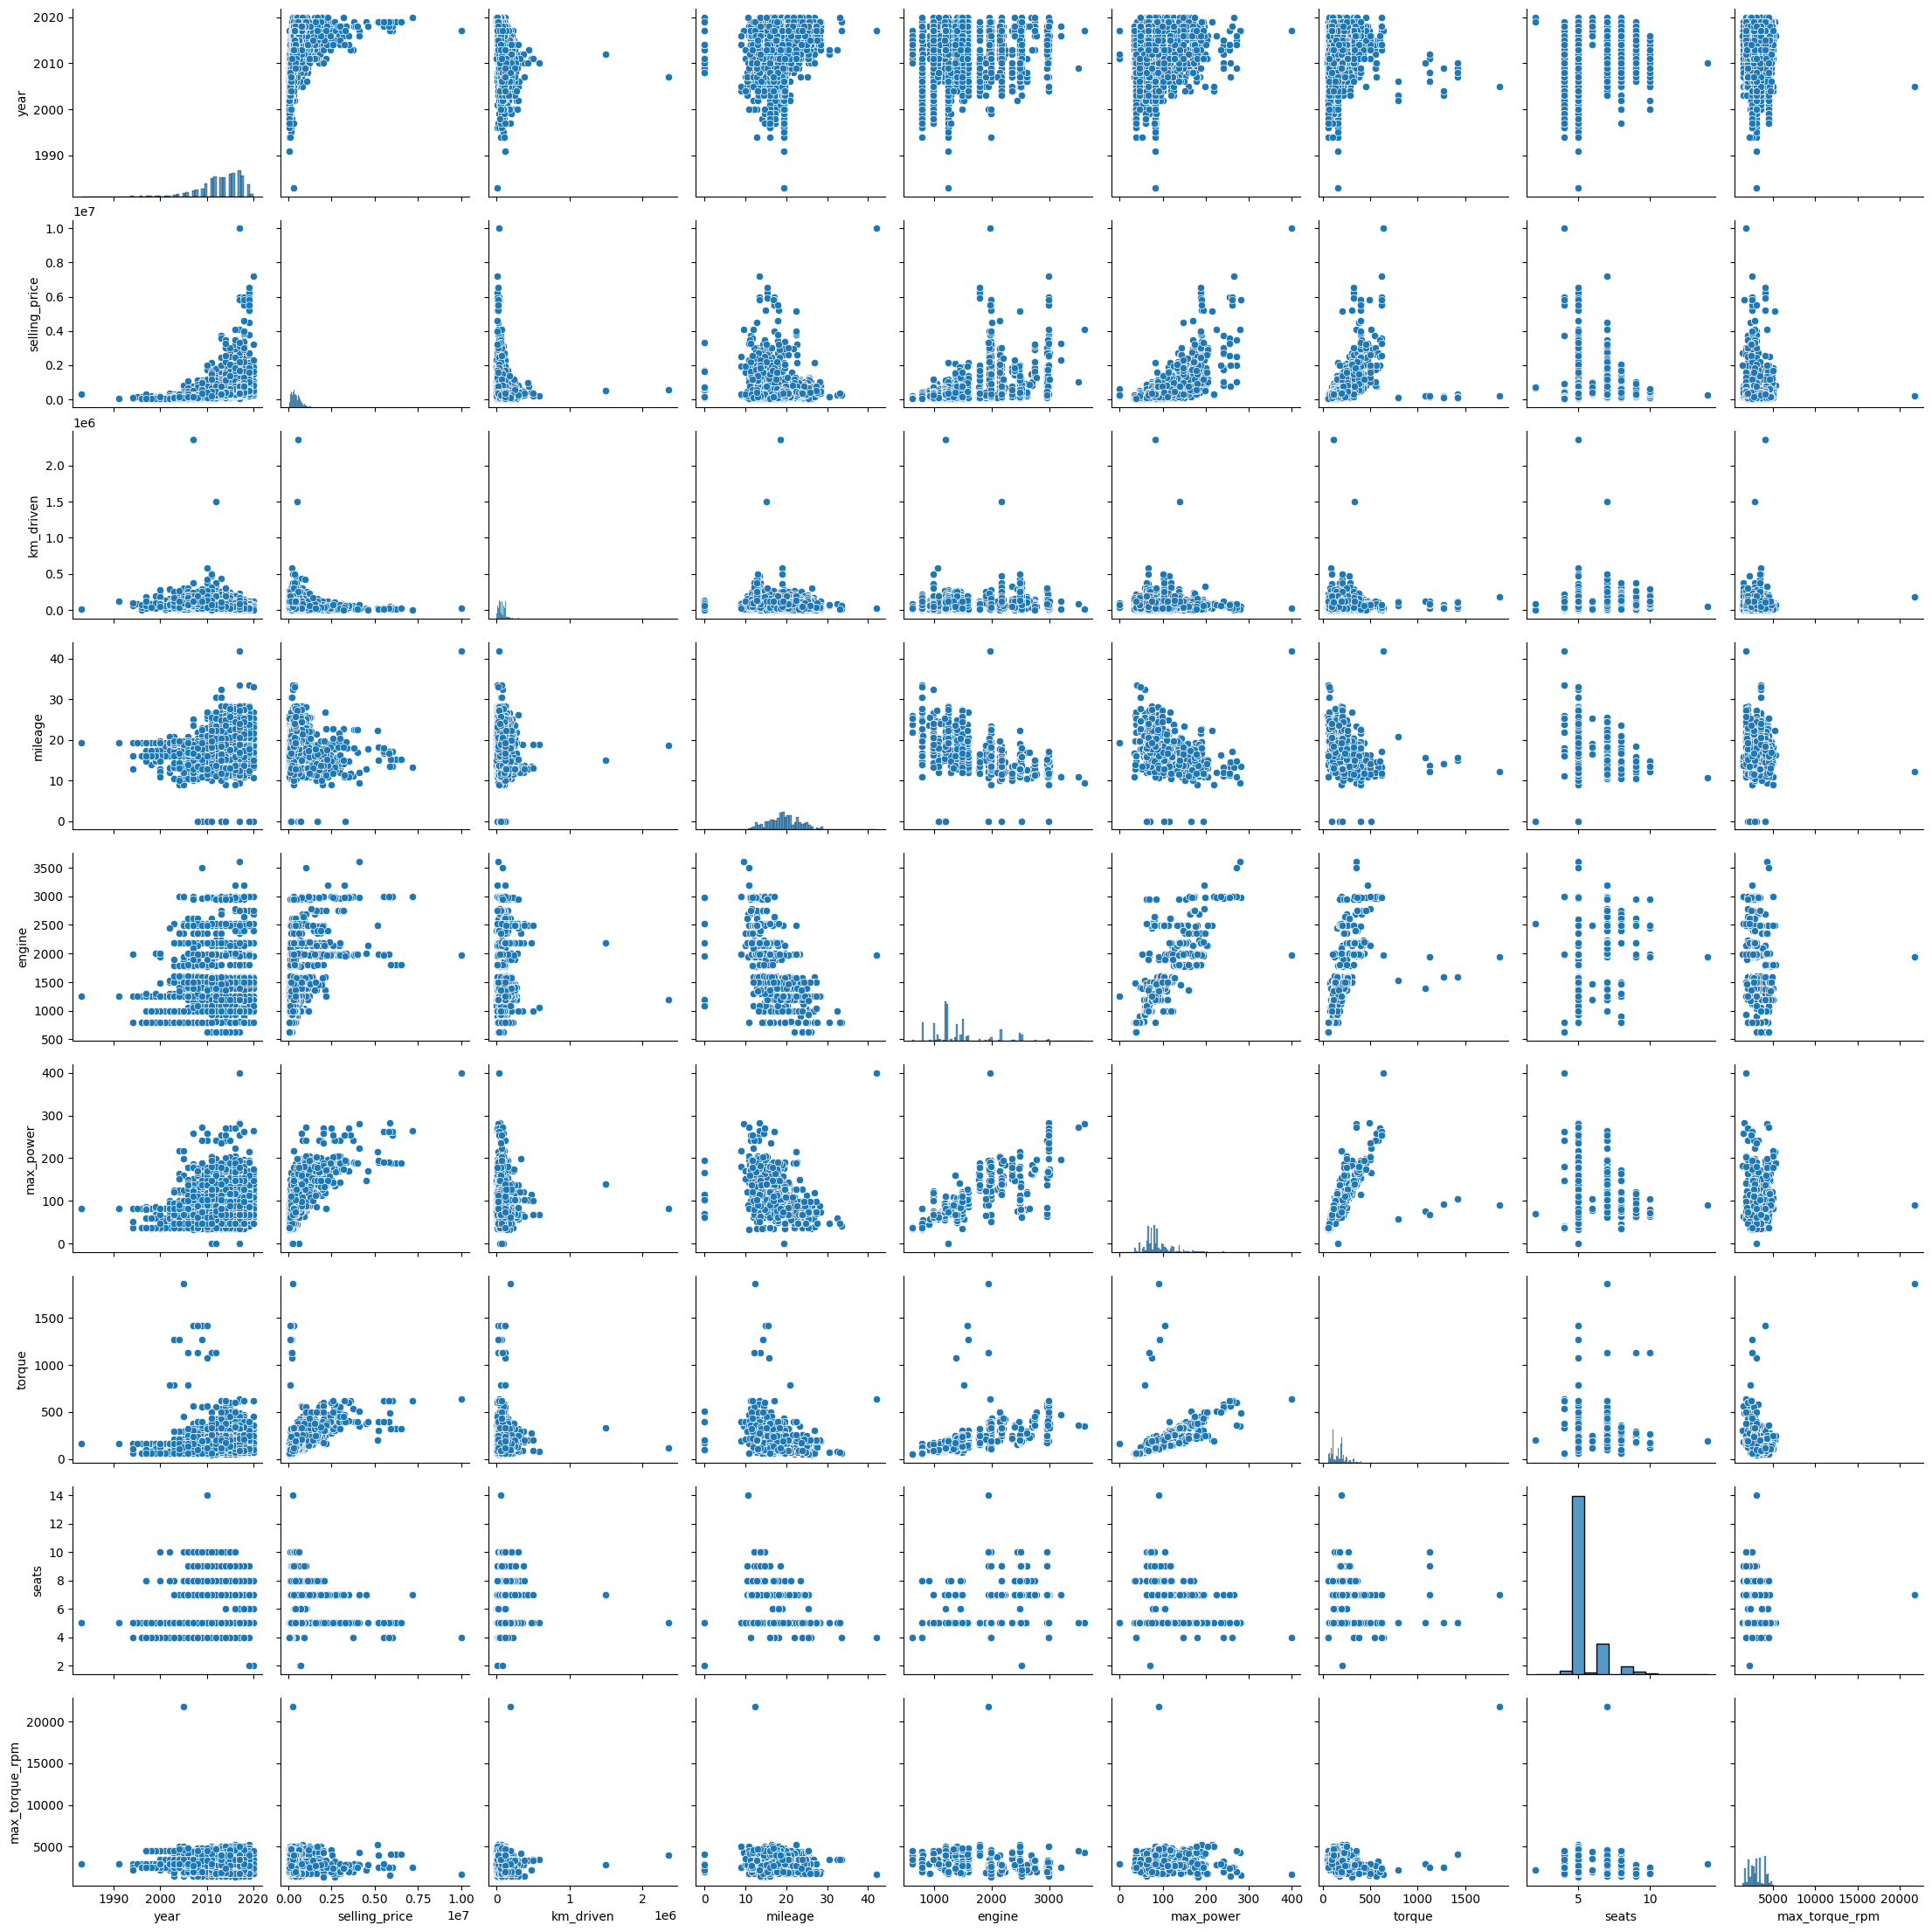

In [33]:
sns.pairplot(df_train.select_dtypes(exclude=['object']))


Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Что можно сказать о связи предикторов с целевой переменной?**
  1. Наблюдается положительная корреляция цены с крутящим моментом(torque)
  2. Положительная корреляция цены с max_power
  3. C натяжкой можно сказать, что чем меньше пробег тем выше цена
  4. Чем новее машина тем больше цена
  
  **А о корреляциях признаков?**
  1. Наблюдается корреляция признаков engine, max_power, torque

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

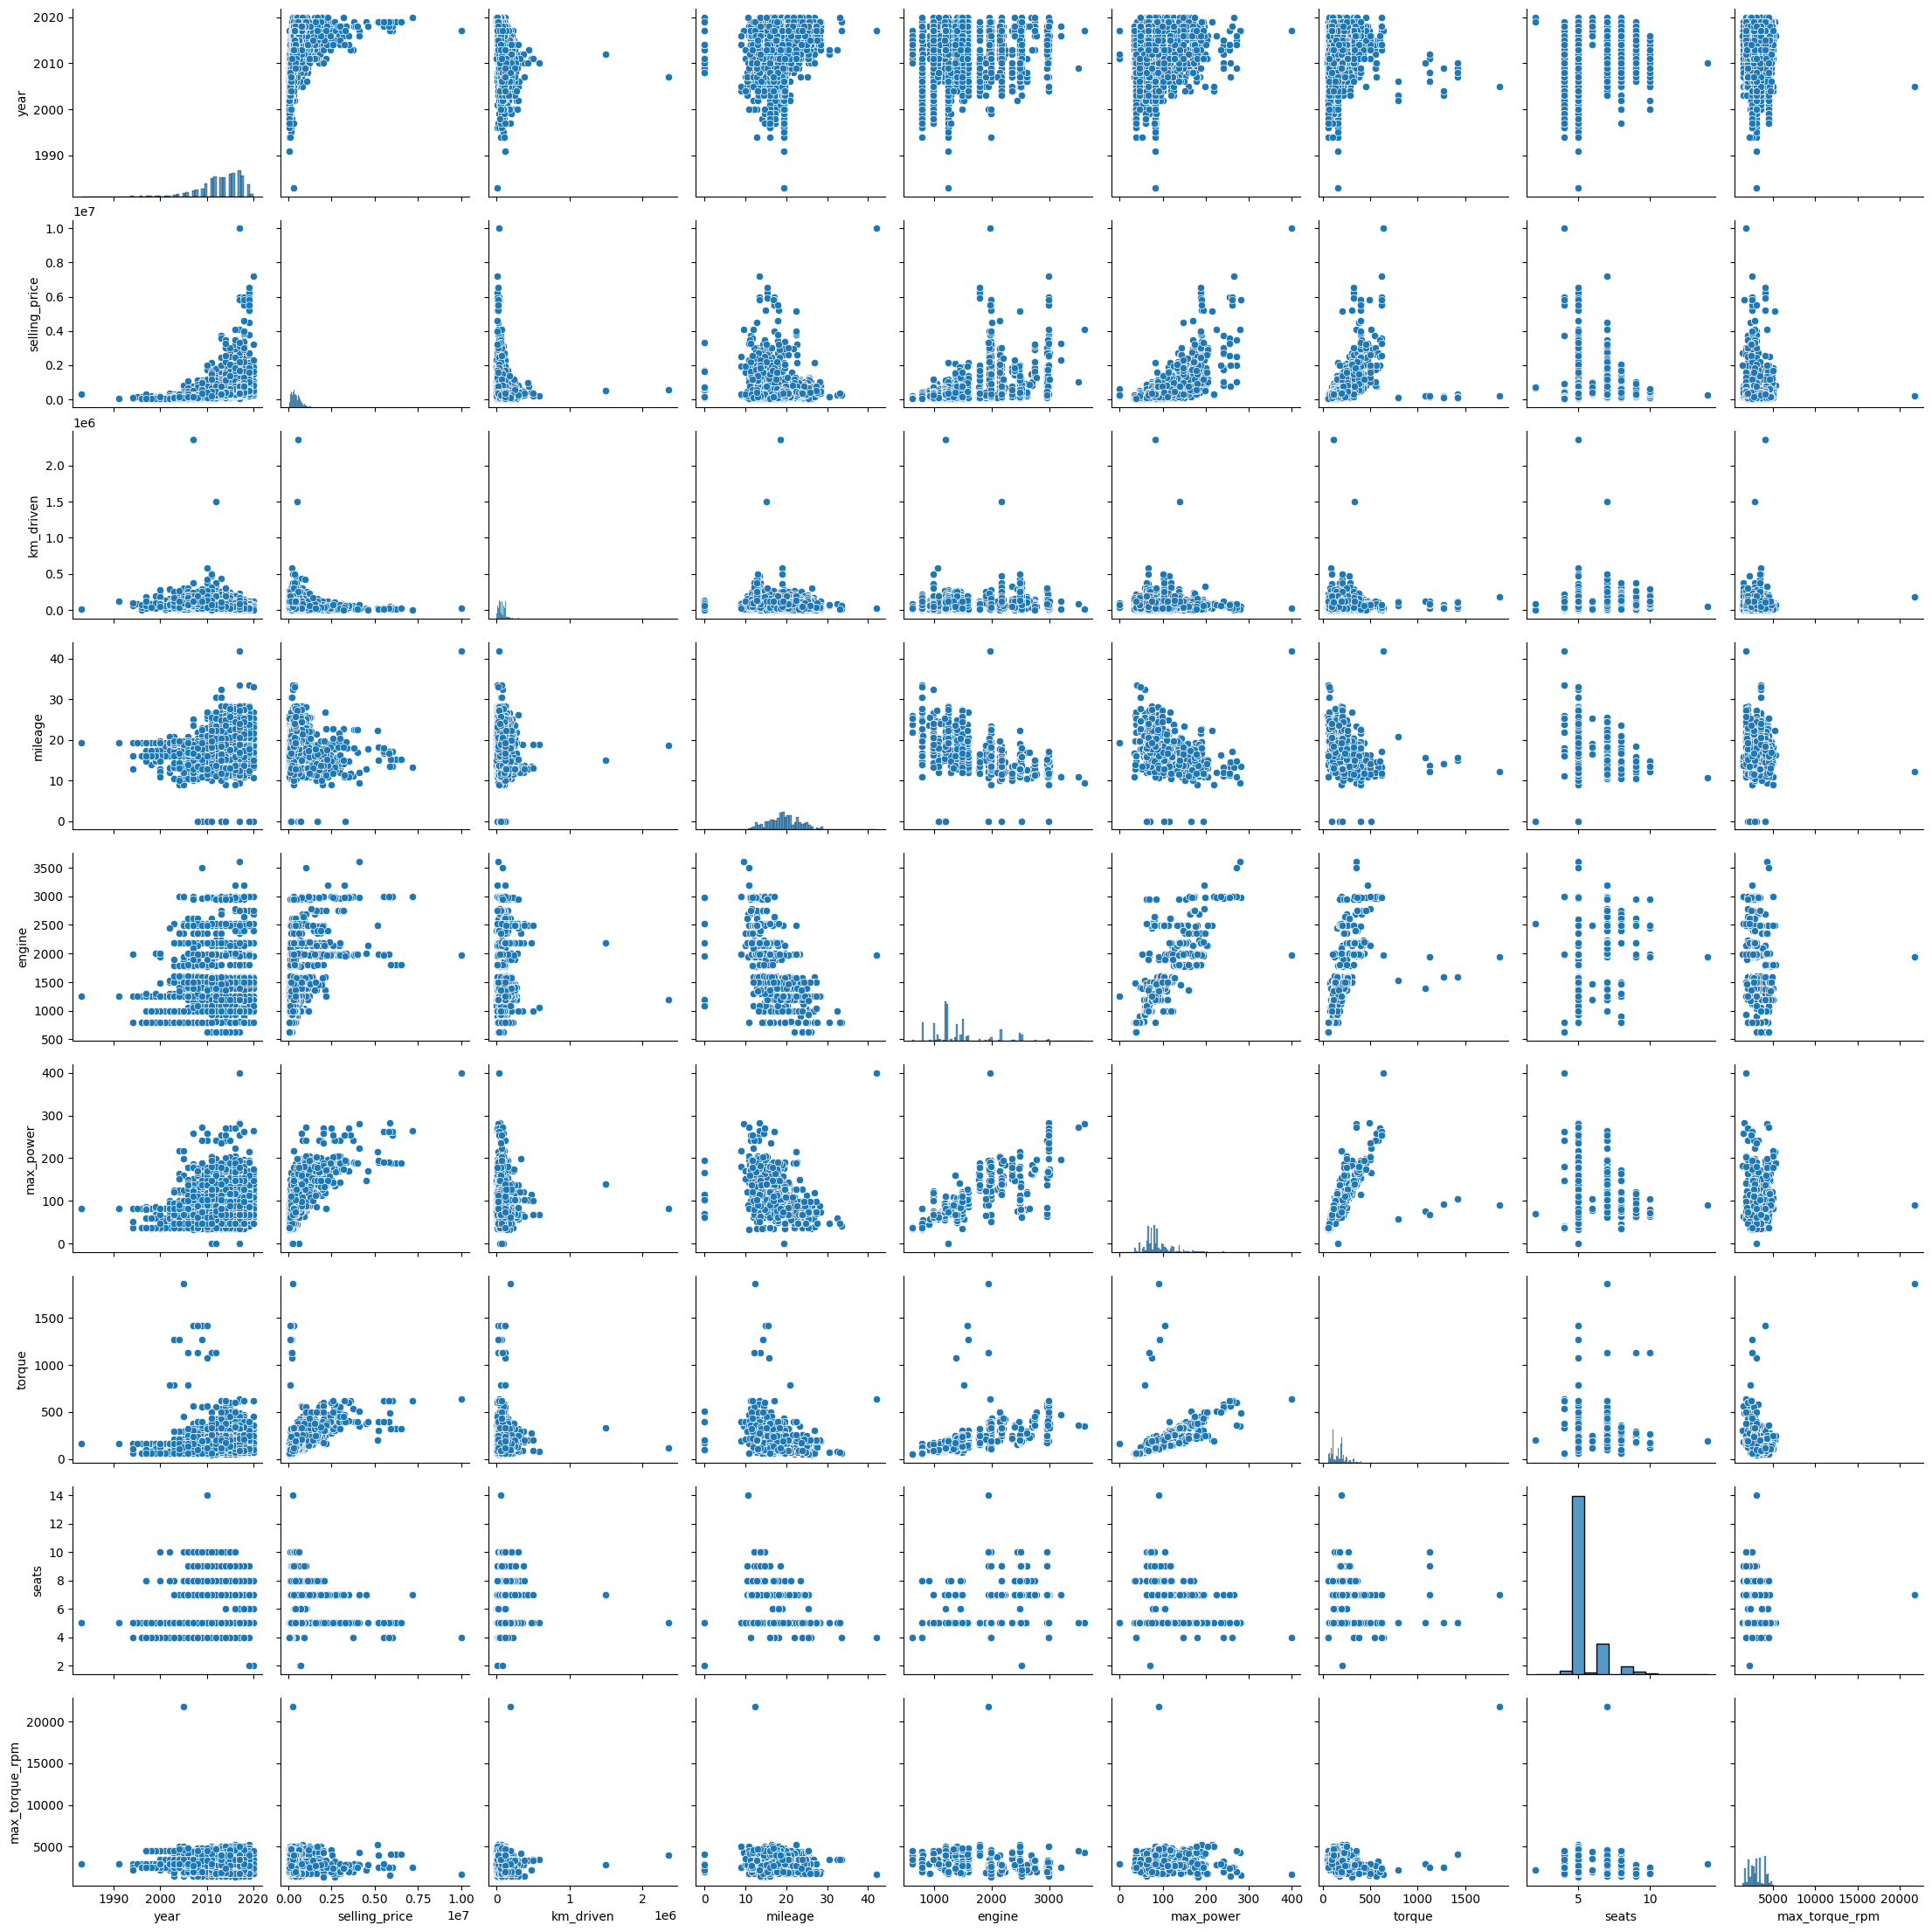

In [34]:
sns.pairplot(df_train.select_dtypes(exclude=['object']))

В целом, гляда на графики, мы можем утверждать, что распределения в трейне и тесте похожи

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

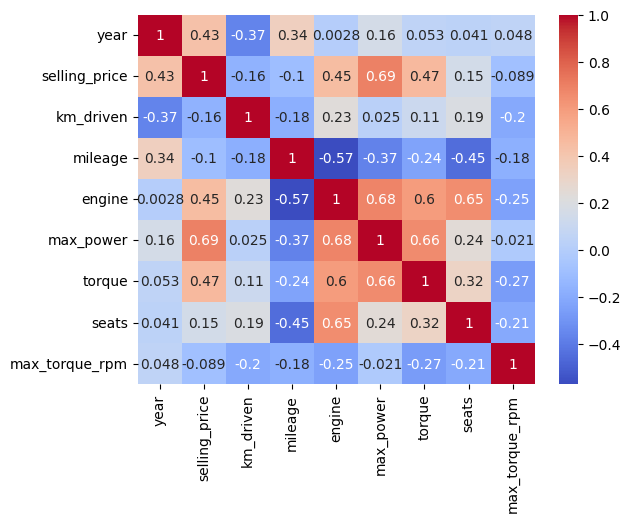

In [35]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm');

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

 1. Наименее скоррелированы year и engine
 2. Довольно сильная положительная линейная зависимость наблюдается между selling_price и max_power, engine и max_power, seats и engine, max_power и torque
 3. Корреляция между годом и пробегом отрицательная - поэтому да, чем больше год тем меньше пробег, но корреляция всего лишь -0.37 так что явно есть новые машины с большим пробегом.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

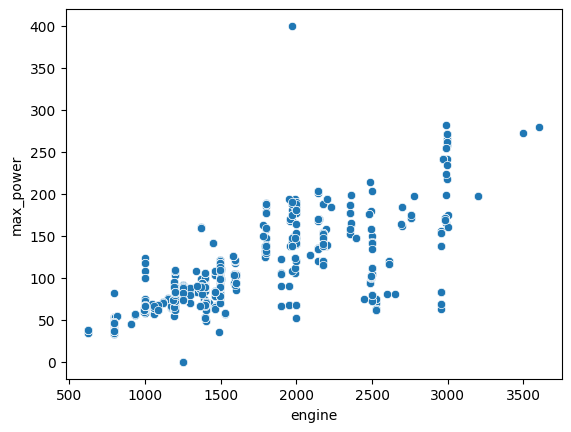

In [36]:
sns.scatterplot(data=df_train, x='engine', y='max_power');

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Остались в стороне категориальные признаки - давайте исправим эту несправедливость)

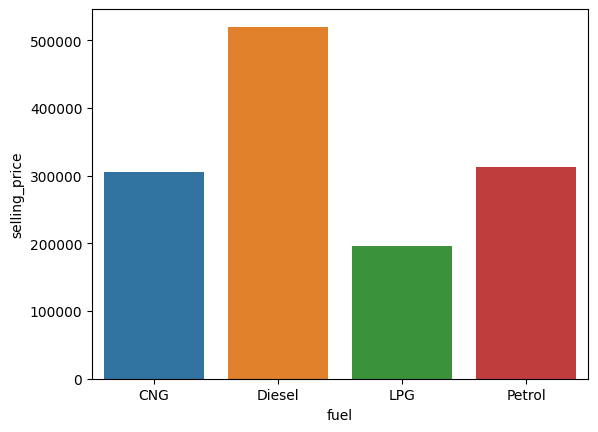

In [37]:
# посмотрим на медианные цены в зависимости от типу топлива
sns.barplot(data = df_train.groupby('fuel')['selling_price'].median().reset_index(),
            x = 'fuel', y = 'selling_price');

Самая высокая медианная цена у дизельных двигателей, самая маленькая у газовых.

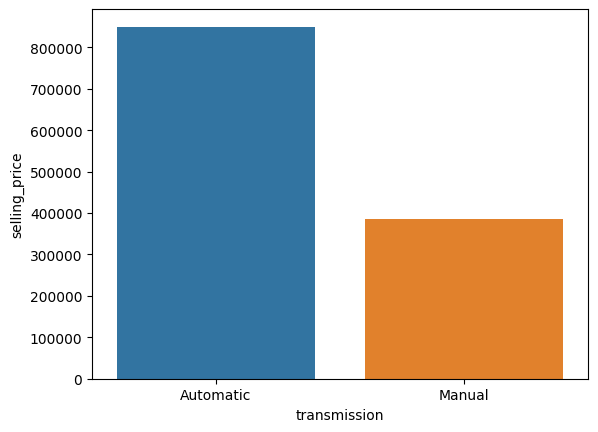

In [38]:
# посмотрим на медиану цены мащины в зависимости от коробки передач
sns.barplot(data = df_train.groupby('transmission')['selling_price'].median().reset_index(),
            x = 'transmission', y = 'selling_price');

Машины с АКП имеют мединную стоимость в два раза больше чем машины на механике.

Так же будет полезным посмотреть на боксплоты и оценить выбросы, если они есть.

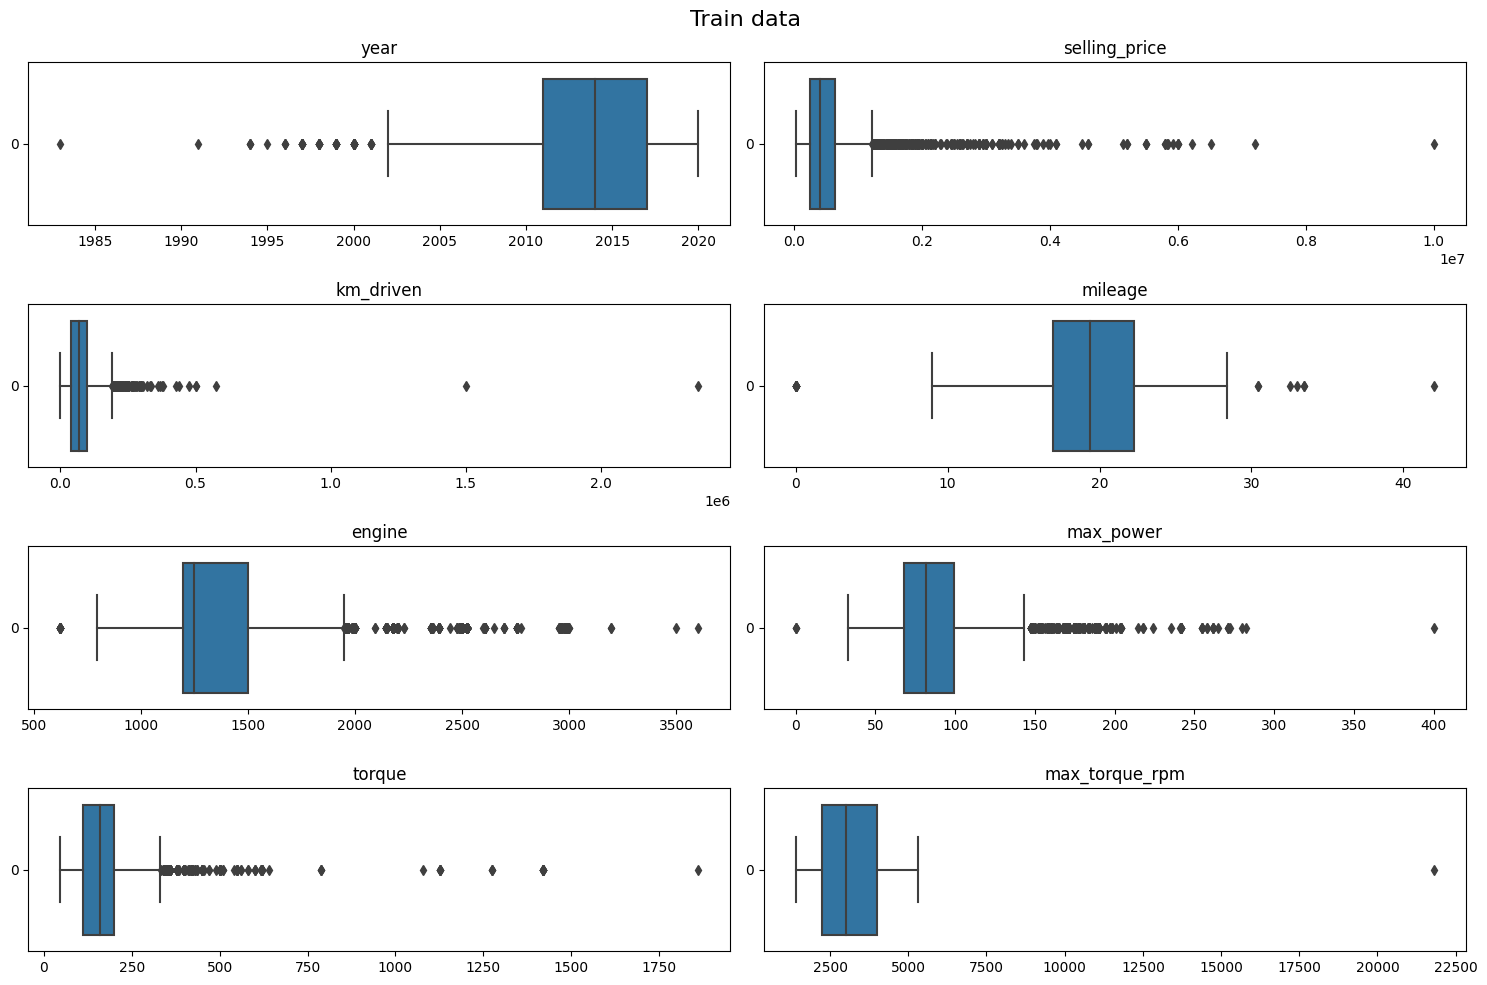

In [39]:
cols = ['year','selling_price','km_driven','mileage','engine','max_power','torque','max_torque_rpm']

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
for idx, col in enumerate(cols):
    sns.boxplot(df_train[col],orient = 'h', ax=ax[idx//2,idx%2])
    ax[idx//2,idx%2].set_title(col)

plt.suptitle("Train data", fontsize=16)
plt.tight_layout()

Пару слов по графикам:

1. Основная доля машин 10-х годов выпуска, есть выбросы(старые машины) но природаэтих выбросов понятна и не является подозрительной.
2. В целевой переменной много выбросов, но опять же есть машины, которые стоят очень дорого(премиум класс, спорткары итд) а основная часть машин(седан среднего класса) стоят примерно одинаково поэтому выбросы не кажутся странными.
3. Странными кажутся только колонке mileage и max_power, а именно то , что вряд ли возможно представить себе машину с 0 лошадинных сил и 0 расхода топлива на единицу пройденного пути.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [40]:
y_train = df_train.selling_price
X_train = df_train[['year','km_driven','mileage','engine','max_power','torque','seats','max_torque_rpm']]


In [41]:
assert X_train.shape == (5840, 8)

In [42]:
y_test = df_test.selling_price
X_test = df_test[['year','km_driven','mileage','engine','max_power','torque','seats','max_torque_rpm']]

In [43]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

base_model = LinearRegression()
base_model.fit(X_train,y_train)
base_model_prediction_train = base_model.predict(X_train)
base_model_prediction_test = base_model.predict(X_test)

print(f'r2_score on train: {r2_score(y_train,base_model_prediction_train)}')
print(f'MSE on train: {MSE(y_train, base_model_prediction_train)}')
print(f'r2_score on test: {r2_score(y_test, base_model_prediction_test)}')
print(f'MSE on test: {MSE(y_test, base_model_prediction_test)}')


r2_score on train: 0.6010639487597855
MSE on train: 114350366838.55176
r2_score on test: 0.6003006700242977
MSE on test: 229758588539.58694


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

base_model.fit(X_train_scaled,y_train)
base_model_prediction_train = base_model.predict(X_train_scaled)
base_model_prediction_test = base_model.predict(X_test_scaled)

print(f'r2_score on train: {r2_score(y_train, base_model_prediction_train)}')
print(f'MSE on train: {MSE(y_train, base_model_prediction_train)}')
print(f'r2_score on test: {r2_score(y_test, base_model_prediction_test)}')
print(f'MSE on test: {MSE(y_test, base_model_prediction_test)}')

r2_score on train: 0.6010639487597851
MSE on train: 114350366838.55188
r2_score on test: 0.6003006700242968
MSE on test: 229758588539.58746


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [46]:
weights = pd.DataFrame({'feature': X_train_scaled.columns, 'weight':base_model.coef_})
f = weights.loc[weights.weight.abs().idxmax()][0]
print(f'Наиболее информативный признак для предсказания цены: {f}')

Наиболее информативный признак для предсказания цены: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [47]:
from sklearn.linear_model import Lasso

l1_reg = Lasso()
l1_reg.fit(X_train_scaled, y_train)
l1_reg_pred_train = l1_reg.predict(X_train_scaled)
l1_reg_pred_test = l1_reg.predict(X_test_scaled)

print(f'r2_score on train: {r2_score(y_train, l1_reg_pred_train)}')
print(f'MSE on train: {MSE(y_train, l1_reg_pred_train)}')
print(f'r2_score on test: {r2_score(y_test, l1_reg_pred_test)}')
print(f'MSE on test: {MSE(y_test, l1_reg_pred_test)}')

r2_score on train: 0.601063948712424
MSE on train: 114350366852.1274
r2_score on test: 0.6002993916743924
MSE on test: 229759323371.61664


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [48]:
l1_reg.coef_

array([165558.76529402, -48953.94161005,  -8235.77282278,  22528.05627792,
       328633.12162844,   7986.78185083, -30421.82831979, -58570.32982845])

L1 регуляризация зануляет веса, которые вносят маленький вклад в предсказание, мы же видим, что все веса наших вещественных параметров большие. Некоторые веса возможно и могли бы занулиться, но для этого надо увеличить коэффициент регуляризации.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [49]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(l1_reg, param_grid={'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10]}, cv=10, scoring='r2', verbose=1)
grid.fit(X_train_scaled,y_train)
grid.best_params_

Fitting 10 folds for each of 13 candidates, totalling 130 fits


{'alpha': 10}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

130 моделей - 13 параметров перебирались по 10 фолдам.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [50]:
grid_model_l1 = Lasso(alpha=10)
grid_model_l1.fit(X_train_scaled,y_train)
grid_model_l1.coef_

array([165538.60585191, -48945.51072987,  -8205.65931021,  22510.20503272,
       328645.88890837,   7980.97741353, -30385.77207225, -58551.42898309])

У лучшей модели коэфф регуляризации был равен 10. Никакие веса при обучении Лассо регресси с коэффом 10 не занулились.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [51]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet()
params = {'alpha': np.arange(0.1,1.1,0.1), 'l1_ratio': np.arange(0.1,1.1,0.1)}
elastic_grid = GridSearchCV(elastic_model,params,cv=10,verbose=1)
elastic_grid.fit(X_train_scaled,y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             verbose=1)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [52]:
elastic_grid.best_params_

{'alpha': 0.6, 'l1_ratio': 0.8}

In [53]:
elastic = ElasticNet(alpha=0.6,l1_ratio=0.8)
elastic.fit(X_train_scaled,y_train)
elastic_pred_train = elastic.predict(X_train_scaled)
elastic_pred_test = elastic.predict(X_test_scaled)

print(f'r2_score on train: {r2_score(y_train, elastic_pred_train)}')
print(f'MSE on train: {MSE(y_train, elastic_pred_train)}')
print(f'r2_score on test: {r2_score(y_test, elastic_pred_test)}')
print(f'MSE on test: {MSE(y_test, elastic_pred_test)}')

r2_score on train: 0.5938099491754081
MSE on train: 116429641225.86653
r2_score on test: 0.5731003869251055
MSE on test: 245394087986.45236


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [54]:
X_train_cat = df_train.drop(columns=['name','selling_price'], axis=1)
X_test_cat = df_test.drop(columns=['name','selling_price'], axis=1)
X_train_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.70,5,4500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0


In [55]:
assert X_train_cat.shape == (5840, 12)
assert X_test_cat.shape == (1000, 12)

In [56]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [57]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# преобразуем seats к строке для дальнейшего кодирования
X_train_cat.seats = X_train_cat.seats.astype(str)
X_test_cat.seats = X_test_cat.seats.astype(str)

# инициализируем кодировщик и обучаем
cat_features = ['transmission', 'seats', 'fuel', 'seller_type', 'owner']
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
ohe.fit(X_train_cat[cat_features])

# преобразуем трейн
X_train_cat_encoded = pd.DataFrame(ohe.transform(X_train_cat[cat_features]))
X_train_cat_encoded.columns = ohe.get_feature_names_out(cat_features)
X_train_cat = pd.concat([X_train_cat.drop(cat_features, axis=1), X_train_cat_encoded], axis=1)

# преобразуем тест
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test_cat[cat_features]))
X_test_cat_encoded.columns = ohe.get_feature_names_out(cat_features)
X_test_cat = pd.concat([X_test_cat.drop(cat_features, axis=1), X_test_cat_encoded], axis=1)


Перед обучением нормализуем наши данные

In [58]:
X_train_ohe_scaled = pd.DataFrame(scaler.fit_transform(X_train_cat), columns = X_train_cat.columns)
X_test_ohe_scaled = pd.DataFrame(scaler.transform(X_test_cat), columns = X_test_cat.columns)

In [59]:
X_train_ohe_scaled.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,transmission_Manual,seats_14,seats_2,...,seats_9,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.136811,-1.147640,0.307332,-0.013087,-0.018509,...,-0.10854,0.915539,-0.076525,-0.889304,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.697019,-0.599393,0.307332,-0.013087,-0.018509,...,-0.10854,0.915539,-0.076525,-0.889304,0.343702,-0.065568,-0.156721,1.600984,-0.02618,-0.290332
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.412434,-0.325270,0.307332,-0.013087,-0.018509,...,-0.10854,0.915539,-0.076525,-0.889304,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.584923,1.593594,0.307332,-0.013087,-0.018509,...,-0.10854,-1.092252,-0.076525,1.124475,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.575119,1.045347,0.307332,-0.013087,-0.018509,...,-0.10854,-1.092252,-0.076525,1.124475,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332


In [60]:
X_test_ohe_scaled.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,transmission_Manual,seats_14,seats_2,...,seats_9,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.837167,1.565740,-1.362605,2.200379,0.761548,0.790387,-0.928341,0.307332,-0.013087,-0.018509,...,-0.10854,0.915539,-0.076525,-0.889304,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
1,0.872122,-0.814974,0.519155,0.139102,0.650920,0.790387,-0.325270,0.307332,-0.013087,-0.018509,...,-0.10854,0.915539,-0.076525,-0.889304,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
2,-1.569719,2.405866,-1.638596,0.760986,1.330489,-0.031251,1.374295,-3.253813,-0.013087,-0.018509,...,-0.10854,-1.092252,-0.076525,1.124475,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
3,0.383754,1.648982,1.422399,0.141162,0.338003,0.230179,-1.421763,0.307332,-0.013087,-0.018509,...,-0.10854,0.915539,-0.076525,-0.889304,0.343702,-0.065568,-0.156721,-0.624616,-0.02618,-0.290332
4,-0.592983,-0.065798,-0.735352,-0.530144,-0.724021,-0.740848,-0.051146,0.307332,-0.013087,-0.018509,...,-0.10854,-1.092252,-0.076525,1.124475,0.343702,-0.065568,-0.156721,1.600984,-0.02618,-0.290332


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid={'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10]}, cv=10, scoring='r2', verbose=1)
grid.fit(X_train_ohe_scaled,y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 5, 10]},
             scoring='r2', verbose=1)

In [62]:
grid.best_params_

{'alpha': 10}

In [63]:
best_ridge = Ridge(alpha=10)
best_ridge.fit(X_train_ohe_scaled,y_train)
best_ridge_pred_train = best_ridge.predict(X_train_ohe_scaled)
best_ridge_pred_test = best_ridge.predict(X_test_ohe_scaled)

print(f'r2_score on train: {r2_score(y_train, best_ridge_pred_train)}')
print(f'MSE on train: {MSE(y_train, best_ridge_pred_train)}')
print(f'r2_score on test: {r2_score(y_test, best_ridge_pred_test)}')
print(f'MSE on test: {MSE(y_test, best_ridge_pred_test)}')

r2_score on train: 0.6737711018702571
MSE on train: 93509709284.23375
r2_score on test: 0.6328415777007257
MSE on test: 211053145580.78186


Качество модели получилось улучшить лишь на ~ 0.03

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [64]:
fe_train = df_train.copy()
fe_test = df_test.copy()

fe_train.seats = fe_train.seats.astype(str)
fe_test.seats = fe_test.seats.astype(str)

In [65]:
fe_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.70,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0


In [66]:
# Кол-во лошадок на литр обьема двигателя
fe_train['power_per_litr'] = round(fe_train.max_power / (fe_train.engine / 1000),2)
fe_test['power_per_litr'] = round(fe_test.max_power / (fe_test.engine / 1000),2)

# квадрат года
fe_train['year'] = fe_train.year ** 2
fe_test['year'] = fe_test.year ** 2

# марка и модель автомобиля
fe_train['model'] = fe_train.name.apply(lambda x: x.split()[1])
fe_test['model'] = fe_test.name.apply(lambda x: x.split()[1])
fe_train['name'] = fe_train.name.apply(lambda x: x.split()[0])
fe_test['name'] = fe_test.name.apply(lambda x: x.split()[0])

# пробег в год
fe_train['km_driven_per_year'] = round(fe_train.km_driven / (2023 - fe_train.year**0.5),2)
fe_test['km_driven_per_year'] = round(fe_test.km_driven / (2023 - fe_test.year**0.5),2)


# помним про записи где max_power = 0 и milage = 0
# можно было бы заполнить нулвые значения max_power, значениями max_power соответствующих машин в таблице
# но таких пропусков не так много поэтому можно просто отбросить их
fe_train = fe_train[fe_train.max_power > 0]
fe_test = fe_test[fe_test.max_power > 0]
fe_train = fe_train[fe_train.mileage > 0]
fe_test = fe_test[fe_test.mileage > 0]


In [67]:
y_train = fe_train.selling_price
y_test = fe_test.selling_price
fe_train = fe_train.drop(columns=['selling_price'], axis=1)
fe_test = fe_test.drop(columns=['selling_price'], axis=1)

# категориальные и вещественные фичи
cat_cols = fe_train.select_dtypes(include=['object', 'category']).columns
num_cols = fe_train.select_dtypes(exclude=['object', 'category']).columns

# кодируем фичи
fe_train_ohe = pd.DataFrame(ohe.fit_transform(fe_train[cat_cols]), columns=ohe.get_feature_names_out(cat_cols))
fe_test_ohe = pd.DataFrame(ohe.transform(fe_test[cat_cols]), columns=ohe.get_feature_names_out(cat_cols))

# нормализуем фичи
fe_train_scaled = pd.DataFrame(scaler.fit_transform(fe_train[num_cols]),columns=num_cols)
fe_test_scaled = pd.DataFrame(scaler.transform(fe_test[num_cols]),columns=num_cols)

# преобразованные датафреймы
train_final = pd.concat([fe_train_scaled,fe_train_ohe], axis=1)
test_final = pd.concat([fe_test_scaled,fe_test_ohe], axis=1)



In [68]:
train_final

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,power_per_litr,km_driven_per_year,name_Audi,...,model_XUV500,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20
0,0.138198,1.189445,1.012030,-0.373403,-0.441965,0.137249,-1.146963,-0.279066,1.561705,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.138198,0.765286,0.428923,0.141894,0.493490,0.697724,-0.599218,0.526178,1.028752,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.838547,0.881722,0.908825,-0.068347,0.065057,0.413003,-0.325346,0.145696,0.358344,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.569831,0.765286,-0.871459,-0.270344,0.008017,-0.584831,1.591759,0.431057,-0.068499,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872031,-0.482242,0.170910,-0.478524,-0.192891,-0.575023,1.044014,0.467137,-0.068499,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,-1.326191,1.946278,-0.401877,-0.707315,-0.819063,-0.739896,-0.051474,-0.452087,0.915892,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5819,-0.106170,-0.399073,-0.149025,-0.888700,-0.660618,-0.796878,0.496270,0.372017,-0.538750,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5820,-0.106170,0.598949,-0.252230,-0.478524,-0.161519,-0.575490,1.044014,0.534378,0.589852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5821,-1.569831,0.748652,-0.690851,0.131588,0.698834,0.559474,-0.325346,0.900919,-0.080255,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
final_grid = GridSearchCV(Ridge(),param_grid={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]},
                         cv=10, scoring='r2')
final_grid.fit(train_final,y_train)
final_grid.best_params_

{'alpha': 0.5}

In [70]:
model = Ridge(alpha=0.5)
model.fit(train_final,y_train)
train_pred = model.predict(train_final)
test_pred = model.predict(test_final)


print(f'r2_score on train: {r2_score(y_train, train_pred)}')
print(f'MSE on train: {MSE(y_train, train_pred)}')
print(f'r2_score on test: {r2_score(y_test, test_pred)}')
print(f'MSE on test: {MSE(y_test, test_pred)}')

r2_score on train: 0.8933452023667521
MSE on train: 30447529542.7737
r2_score on test: 0.9208647347813547
MSE on test: 45515087592.243385


Результат оказлся очень не плохим, правда смущает то, что скор на трейне хуже чем на тесте. Возможно распределение данных на трейне чуть хуже чем на тесте и модель лучше обощает тестовые данные.

Посмотрим на распределения вещественных признаков и целевой переменной чуть поближе и внимательнее.

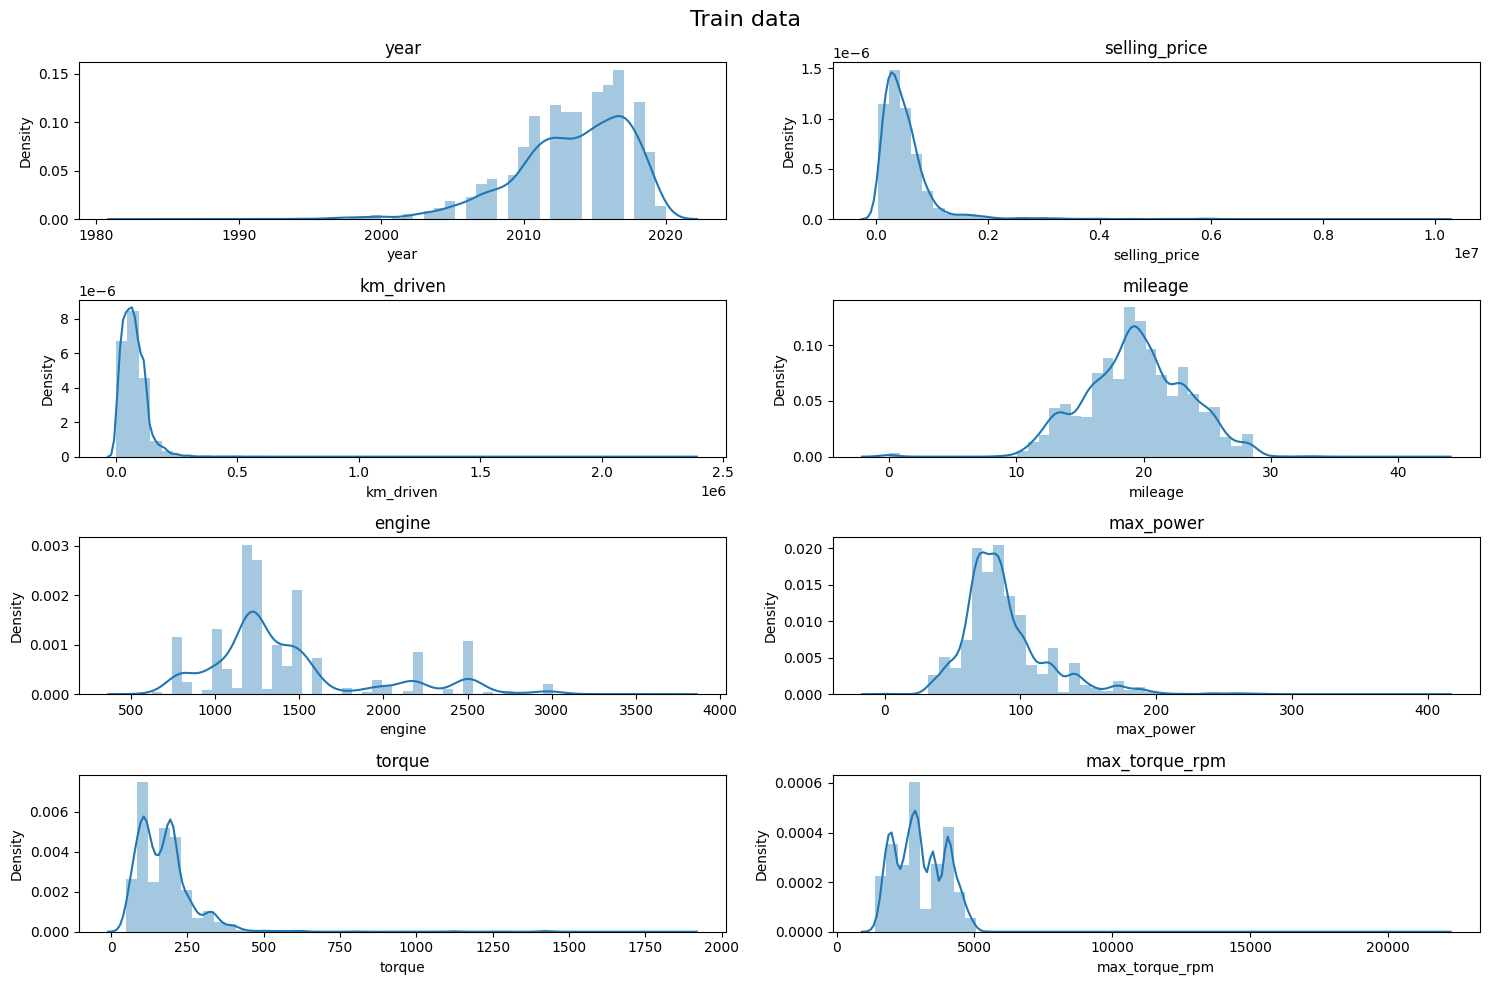

In [71]:
cols = ['year','selling_price','km_driven','mileage','engine','max_power','torque','max_torque_rpm']

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
for idx, col in enumerate(cols):
    sns.distplot(df_train[col], ax=ax[idx//2,idx%2])
    ax[idx//2,idx%2].set_title(col)

plt.suptitle("Train data", fontsize=16)
plt.tight_layout()

Распределение целевой переменная, а также km_driven, torque, max_torque далеки от нормальных - попробуем прологарифмировать их и обучить модель на таких данных и посмотреть улучшил ли это обощаю способность нашей модели.

In [72]:
df_train.seats = df_train.seats.astype(str)
df_test.seats = df_test.seats.astype(str)

# Кол-во лошадок на литр обьема двигателя
df_train['power_per_litr'] = round(df_train.max_power / (df_train.engine / 1000),2)
df_test['power_per_litr'] = round(df_test.max_power / (df_test.engine / 1000),2)

# квадрат года
df_train['year'] = df_train.year ** 2
df_test['year'] = df_test.year ** 2

# марка и модель автомобиля
df_train['model'] = df_train.name.apply(lambda x: x.split()[1])
df_test['model'] = df_test.name.apply(lambda x: x.split()[1])
df_train['name'] = df_train.name.apply(lambda x: x.split()[0])
df_test['name'] = df_test.name.apply(lambda x: x.split()[0])

# пробег в год
df_train['km_driven_per_year'] = round(df_train.km_driven / (2023 - df_train.year**0.5),2)
df_test['km_driven_per_year'] = round(df_test.km_driven / (2023 - df_test.year**0.5),2)



df_train = df_train[df_train.max_power > 0]
df_test = df_test[df_test.max_power > 0]
df_train = df_train[df_train.mileage > 0]
df_test = df_test[df_test.mileage > 0]


df_train.selling_price = np.log(df_train.selling_price)
df_test.selling_price = np.log(df_test.selling_price)
df_train.km_driven = np.log(df_train.km_driven)
df_test.km_driven = np.log(df_test.km_driven)
df_train.torque = np.log(df_train.torque)
df_test.torque = np.log(df_test.torque)
df_train.max_torque_rpm = np.log(df_train.max_torque_rpm)
df_test.max_torque_rpm = np.log(df_test.max_torque_rpm)

y_train = df_train.selling_price
y_test = df_test.selling_price
df_train = df_train.drop(columns=['selling_price'], axis=1)
df_test = df_test.drop(columns=['selling_price'], axis=1)

# категориальные и вещественные фичи
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
num_cols = df_train.select_dtypes(exclude=['object', 'category']).columns

# кодируем фичи
df_train_ohe = pd.DataFrame(ohe.fit_transform(df_train[cat_cols]), columns=ohe.get_feature_names_out(cat_cols))
df_test_ohe = pd.DataFrame(ohe.transform(df_test[cat_cols]), columns=ohe.get_feature_names_out(cat_cols))

# нормализуем фичи
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_cols]),columns=num_cols)
df_test_scaled = pd.DataFrame(scaler.transform(df_test[num_cols]),columns=num_cols)

# преобразованные датафреймы
train_final = pd.concat([df_train_scaled,df_train_ohe], axis=1)
test_final = pd.concat([df_test_scaled,df_test_ohe], axis=1)



In [73]:
train_final

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,power_per_litr,km_driven_per_year,name_Audi,...,model_XUV500,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20
0,0.138198,1.145805,1.012030,-0.373403,-0.441965,0.422510,-1.248461,-0.279066,1.561705,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.138198,0.910703,0.428923,0.141894,0.493490,0.986328,-0.508576,0.526178,1.028752,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.838547,0.979879,0.908825,-0.068347,0.065057,0.719213,-0.192553,0.145696,0.358344,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.569831,0.910703,-0.871459,-0.270344,0.008017,-0.650521,1.440368,0.431057,-0.068499,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872031,-0.286049,0.170910,-0.478524,-0.192891,-0.631469,1.049831,0.467137,-0.068499,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,-1.326191,1.477803,-0.401877,-0.707315,-0.819063,-0.977878,0.095953,-0.452087,0.915892,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5819,-0.106170,-0.157494,-0.149025,-0.888700,-0.660618,-1.112608,0.607076,0.372017,-0.538750,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5820,-0.106170,0.804536,-0.252230,-0.478524,-0.161519,-0.632372,1.049831,0.534378,0.589852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5821,-1.569831,0.900492,-0.690851,0.131588,0.698834,0.860955,-0.192553,0.900919,-0.080255,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
final_grid = GridSearchCV(Ridge(),param_grid={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]},
                         cv=10, scoring='r2')
final_grid.fit(train_final,y_train)
final_grid.best_params_

{'alpha': 0.5}

In [75]:
model = Ridge(alpha=0.5)
model.fit(train_final,y_train)
train_pred = model.predict(train_final)
test_pred = model.predict(test_final)


print(f'r2_score on train: {r2_score(y_train, train_pred)}')
print(f'MSE on train: {MSE(y_train, train_pred)}')
print(f'r2_score on test: {r2_score(y_test, test_pred)}')
print(f'MSE on test: {MSE(y_test, test_pred)}')

r2_score on train: 0.9277466186070489
MSE on train: 0.04212257332226409
r2_score on test: 0.9406279596454287
MSE on test: 0.04241845267971504


In [76]:
test_pred[10]

13.804323880379961

In [77]:
with open('model.pkl', 'wb') as f:
  pickle.dump(model,f)
with open('ohe.pkl','wb') as f:
  pickle.dump(ohe,f)
with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [78]:
def business_metrics(y_true, y_pred):
    ten_perc = y_true * 0.1
    less_then_10_perc =  np.abs(y_pred - y_true) <= ten_perc
    return f'{np.round(np.mean(less_then_10_perc) * 100)}%'

business_metrics(np.exp(y_test), np.exp(test_pred))

'45.0%'

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link